In [109]:
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition, Draw
import pandas as pd
import mols2grid
import useful_rdkit_utils as uru
from ipywidgets import interact

In [110]:
df = pd.read_csv("https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/CHEMBL1075104.smi",names=["SMILES","Name","pIC50"])
df.head(3)

,SMILES,Name,pIC50
0,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,CHEMBL24828,5.7
1,Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)...,CHEMBL572878,6.2
2,COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)NC(=O)C(C)(C)O4)...,CHEMBL475251,7.5


### Cluster the Input Data to Identify Similar Molecules

We'll begin by adding an RDKit molecule and a fingerprint to each molecule.


In [111]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)
df['fp'] = df.mol.apply(uru.mol2morgan_fp)

In order to find molecules with a common scaffold, we'll cluster the molecules using the Butina clustering method in the RDKit. 

In [112]:
df['cluster'] = uru.taylor_butina_clustering(df.fp.values)

Let's look at the size of the clusters

In [113]:
df.cluster.value_counts()

cluster
0      322
2      104
6       36
1       13
10       9
      ... 
114      1
115      1
116      1
117      1
15       1
Name: count, Length: 148, dtype: int64

### View the Largest Cluster and Identify the Common Scaffold

Let's look at cluster 0, the largest cluster. 

In [114]:
mols2grid.display(df.query("cluster == 0"),mol_col="mol",subset=["img"])

MolGridWidget()

At first glance, it looks like the structure below is the scaffold. Try searching the structures with that scaffold.

- Click on the arrow next to the magnifying glass in the grid above and select SMARTS.
- Paste the SMILES from the box below into the Search box.



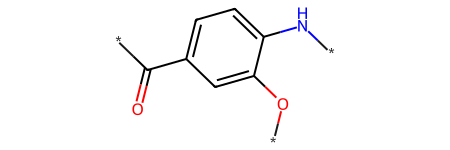

In [115]:
Chem.MolFromSmiles("[*]C(=O)c1ccc(N[*])c(O[*])c1")



We can sketch the scaffold with R-groups in place and save the core with R-groups to a molfile. I sketched this with Marvin Sketch but you should be able to use any chemical sketcher.


In [116]:
# mb = """
#   Mrv2004 04242220562D          

#  13 13  0  0  0  0            999 V2000
#    -1.0632    2.0028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#    -1.7777    1.5903    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#    -1.7777    0.7652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#    -1.0632    0.3527    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#    -0.3488    0.7652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#    -0.3488    1.5903    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#     0.3321    1.9834    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
#    -2.4922    2.0028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#    -2.4922    2.8278    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
#     0.3057    0.2630    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
#    -3.2067    1.5903    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
#     1.0466    1.5709    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
#     0.3057   -0.5620    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
#   1  2  2  0  0  0  0
#   2  3  1  0  0  0  0
#   3  4  2  0  0  0  0
#   4  5  1  0  0  0  0
#   5  6  2  0  0  0  0
#   1  6  1  0  0  0  0
#   6  7  1  0  0  0  0
#   2  8  1  0  0  0  0
#   8  9  2  0  0  0  0
#   5 10  1  0  0  0  0
#   8 11  1  0  0  0  0
#   7 12  1  0  0  0  0
#  10 13  1  0  0  0  0
# M  RGP  3  11   1  12   2  13   3
# M  END
# """

In [117]:
cores = Chem.MolFromSmiles("[*]C(=O)c1ccc(N[*])c(O[*])c1")

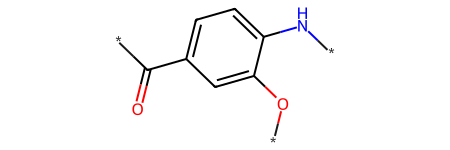

In [118]:
cores

In [119]:
#get molblock from smiles
mb = Chem.MolToMolBlock(cores)
print(mb)


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 R   0  0  0  0  0  1  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 R   0  0  0  0  0  1  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    3.8971    0.0000 R   0  0  0  0  0  1  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0

Now let's create a new Pandas dataframe from the molecules in cluster 0. 

In [120]:
df_0 = df.query("cluster == 0").copy()
print(df_0.shape)

(322, 6)


We'll add an index column to keep track of things

In [121]:
df_0['index'] = range(0,len(df_0))

In [122]:
df_0.head(3)

,SMILES,Name,pIC50,mol,fp,cluster,index
113,CNC(=O)c1ccccc1Nc1nc(Nc2ccc(N3CCOCC3)cc2OC)ncc1Cl,CHEMBL458997,8.60,<rdkit.Chem.rdchem.Mol object at 0x328602a40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
120,CC(=O)NCC(=O)N1C2CCC1c1cc(Nc3ncc(C(F)(F)F)c(NC...,CHEMBL1983111,9.20,<rdkit.Chem.rdchem.Mol object at 0x328602730>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
197,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,CHEMBL2012582,8.22,<rdkit.Chem.rdchem.Mol object at 0x328672b20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,2


### Perform R-group decomposition

As mentioned above, we're using the function rdRGroupDecomposition.RGroupDecompose from the RDKit. Note that RDKit returns two values from this function.

- rgd - a dictionary containing the results of the R-group decomposition. This dictionary has keys containing the core with a key "Core", and the R-groups in keys named "R1", "R2", etc. Each dictionary key links to a list of cores or R-groups corresponding input molecules that matched the core (didn't fail).
- failed - a list containing the indices of molecules that did not match the core.


In [123]:
rgd,failed = rdRGroupDecomposition.RGroupDecompose([cores], df_0.mol.values,asRows=False)

[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[13:24:17] No core matches
[

In [124]:
#Let's look at the rgd dictionary
pd.DataFrame(rgd)

,Core,R1,R2,R3,R4,R5
0,<rdkit.Chem.rdchem.Mol object at 0x300234200>,<rdkit.Chem.rdchem.Mol object at 0x300240970>,<rdkit.Chem.rdchem.Mol object at 0x300245230>,<rdkit.Chem.rdchem.Mol object at 0x300249af0>,<rdkit.Chem.rdchem.Mol object at 0x30024e3b0>,<rdkit.Chem.rdchem.Mol object at 0x300252c70>
1,<rdkit.Chem.rdchem.Mol object at 0x300234190>,<rdkit.Chem.rdchem.Mol object at 0x3002409e0>,<rdkit.Chem.rdchem.Mol object at 0x3002452a0>,<rdkit.Chem.rdchem.Mol object at 0x300249b60>,<rdkit.Chem.rdchem.Mol object at 0x30024e420>,<rdkit.Chem.rdchem.Mol object at 0x300252ce0>
2,<rdkit.Chem.rdchem.Mol object at 0x300234040>,<rdkit.Chem.rdchem.Mol object at 0x300240a50>,<rdkit.Chem.rdchem.Mol object at 0x300245310>,<rdkit.Chem.rdchem.Mol object at 0x300249bd0>,<rdkit.Chem.rdchem.Mol object at 0x30024e490>,<rdkit.Chem.rdchem.Mol object at 0x300252d50>
3,<rdkit.Chem.rdchem.Mol object at 0x300234120>,<rdkit.Chem.rdchem.Mol object at 0x300240ac0>,<rdkit.Chem.rdchem.Mol object at 0x300245380>,<rdkit.Chem.rdchem.Mol object at 0x300249c40>,<rdkit.Chem.rdchem.Mol object at 0x30024e500>,<rdkit.Chem.rdchem.Mol object at 0x300252dc0>
4,<rdkit.Chem.rdchem.Mol object at 0x300234350>,<rdkit.Chem.rdchem.Mol object at 0x300240b30>,<rdkit.Chem.rdchem.Mol object at 0x3002453f0>,<rdkit.Chem.rdchem.Mol object at 0x300249cb0>,<rdkit.Chem.rdchem.Mol object at 0x30024e570>,<rdkit.Chem.rdchem.Mol object at 0x300252e30>
...,...,...,...,...,...,...
160,<rdkit.Chem.rdchem.Mol object at 0x300240740>,<rdkit.Chem.rdchem.Mol object at 0x300245000>,<rdkit.Chem.rdchem.Mol object at 0x3002498c0>,<rdkit.Chem.rdchem.Mol object at 0x30024e180>,<rdkit.Chem.rdchem.Mol object at 0x300252a40>,<rdkit.Chem.rdchem.Mol object at 0x300257300>
161,<rdkit.Chem.rdchem.Mol object at 0x3002407b0>,<rdkit.Chem.rdchem.Mol object at 0x300245070>,<rdkit.Chem.rdchem.Mol object at 0x300249930>,<rdkit.Chem.rdchem.Mol object at 0x30024e1f0>,<rdkit.Chem.rdchem.Mol object at 0x300252ab0>,<rdkit.Chem.rdchem.Mol object at 0x300257370>
162,<rdkit.Chem.rdchem.Mol object at 0x300240820>,<rdkit.Chem.rdchem.Mol object at 0x3002450e0>,<rdkit.Chem.rdchem.Mol object at 0x3002499a0>,<rdkit.Chem.rdchem.Mol object at 0x30024e260>,<rdkit.Chem.rdchem.Mol object at 0x300252b20>,<rdkit.Chem.rdchem.Mol object at 0x3002573e0>
163,<rdkit.Chem.rdchem.Mol object at 0x300240890>,<rdkit.Chem.rdchem.Mol object at 0x300245150>,<rdkit.Chem.rdchem.Mol object at 0x300249a10>,<rdkit.Chem.rdchem.Mol object at 0x30024e2d0>,<rdkit.Chem.rdchem.Mol object at 0x300252b90>,<rdkit.Chem.rdchem.Mol object at 0x300257450>


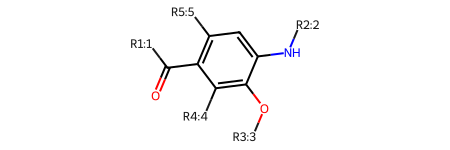

In [125]:
rgd['Core'][0]

Note this core has 5 R-groups, while our input core has 3. Scroll up and see for yourself. This is very cool! The RDKit noticed another point of substitution and added an R-group for us.

Here are the indices of the molecules that failed.


In [126]:
failed

[0,
 1,
 7,
 8,
 9,
 10,
 14,
 15,
 16,
 17,
 21,
 23,
 24,
 25,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 111,
 114,
 119,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 182,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 217,
 226,
 247,
 248,
 249,
 250,
 251,
 252,
 255,
 256,
 260,
 268,
 270,
 271,
 275,
 276,
 277,
 278,
 297,
 298,
 299,
 300,
 303]

Let's look at the molecules that failed and try to figure out why. These results make sense.

- Molecule 7 has a Br in place of the O in the core
- Molecule 0 doesn't have the carbonyl oxygen from the core

In some cases, we may want to go back and modify our core definition to include these molecules. In this case, we'll just skip them.


In [127]:
#Visualise the molecules that failed
mols2grid.display(df_0.iloc[failed],mol_col="mol",subset=["img","index"])

MolGridWidget()

Now we want to delete the rows corresponding to molecules that failed the R-group decomposition from df_0. Since we created df_O from df, it inherited the original dataframe's index. We'll call reset_index to create a new index that simply numbers the rows from 0 to len(df_0).

In [128]:
df_0.reset_index(inplace=True)

Delete the failed rows from df_0. 

In [129]:
df_0 = df_0.drop(failed,axis=0)

Get the names of the R-groups

In [130]:
r_groups = [x for x in rgd.keys() if x != "Core"]
r_groups

['R1', 'R2', 'R3', 'R4', 'R5']

Add SMILES for R-group to df_0

In [131]:
for r in sorted(r_groups):
    df_0[r] = rgd[r]
    df_0[r] = df_0[r].apply(Chem.MolToSmiles)

### View the R-groups and Their Frequency

Create an interactive viewer for the R-groups that shows how many times each R-group was used. Use the menu below to toggle between R1, R2, R3, and R4.

In [ ]:
@interact(rg=r_groups)
def display_rgroups(rg):
    vc_df = uru.value_counts_df(df_0,rg)
    return mols2grid.display(vc_df,smiles_col=rg,subset=["img","count"])

interactive(children=(Dropdown(description='rg', options=('R1', 'R2', 'R3', 'R4', 'R5'), value='R1'), Output()…

# Appendix

### Find Maximum Common Substructure (MCS)

We'll use RDKit's FindMCS function to identify the maximum common substructure across all molecules in cluster 0.


In [135]:
from rdkit.Chem import rdFMCS

# Get all molecules from df_0
mols = df_0['mol'].tolist()

# Find the maximum common substructure
mcs_result = rdFMCS.FindMCS(mols, 
                             timeout=60,  # Maximum time in seconds
                             bondCompare=rdFMCS.BondCompare.CompareOrder,
                             ringMatchesRingOnly=True)

# Get the MCS as SMARTS pattern
mcs_smarts = mcs_result.smartsString

print(f"MCS SMARTS: {mcs_smarts}")
print(f"Number of atoms in MCS: {mcs_result.numAtoms}")
print(f"Number of bonds in MCS: {mcs_result.numBonds}")


MCS SMARTS: [#6]1:&@[#7]:&@[#6](-&!@[#7&!R]-&!@[#6]2:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@2-&!@[#8&!R]):&@[#7]:&@[#6]:&@[#6]:&@1
Number of atoms in MCS: 14
Number of bonds in MCS: 15


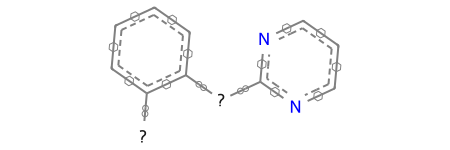

In [136]:
# Convert MCS SMARTS to a molecule and visualize it
mcs_mol = Chem.MolFromSmarts(mcs_smarts)
mcs_mol


In [137]:
# Convert the SMARTS pattern to SMILES for better readability
# First, create a molecule from the SMARTS and convert to SMILES
try:
    mcs_smiles = Chem.MolToSmiles(Chem.MolFromSmarts(mcs_smarts))
    print(f"MCS SMILES: {mcs_smiles}")
except:
    print("Could not convert SMARTS to SMILES. Using SMARTS pattern.")
    print(f"MCS SMARTS: {mcs_smarts}")


MCS SMILES: OC1:C:C:C:C:C:1NC1:N:C:C:C:N:1


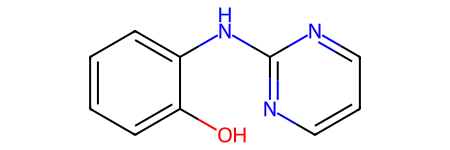

In [138]:
Chem.MolFromSmiles(mcs_smiles)

## ANother example

MCS1 contains 8 atoms and 8 bonds.
MCS SMARTS string: [#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#8]


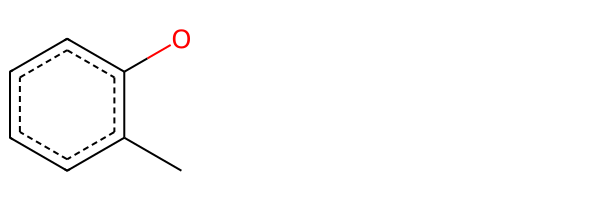

In [139]:
from rdkit.Chem import rdFMCS
mols = [Chem.MolFromSmiles("FCc1ccccc1ON"), Chem.MolFromSmiles("ClCc1ccccc1OC")]

mcs1 = rdFMCS.FindMCS(mols)

print(f"MCS1 contains {mcs1.numAtoms} atoms and {mcs1.numBonds} bonds.")
print("MCS SMARTS string:", mcs1.smartsString)

cs = [Chem.MolFromSmarts('[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#8]')]
Draw.MolsToGridImage(cs)

In [140]:
df_mols = pd.DataFrame({'SMILES': [Chem.MolToSmiles(mol) for mol in mols], 'mol': mols})
df_mols

,SMILES,mol
0,NOc1ccccc1CF,<rdkit.Chem.rdchem.Mol object at 0x300257bc0>
1,COc1ccccc1CCl,<rdkit.Chem.rdchem.Mol object at 0x300258430>


In [141]:
mols2grid.display(df_mols, mol_col='mol')

MolGridWidget()